# EUGENE JAMIL ASANTE
# 3510622
# MET 359
# EXPLORING CLIMATE VARIABILITY AND TRENDS USING CRU TS DATA


# IMPORTING NECESSARY LIBRARIES

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# DEFINING THE BOUNDING BOX OF SOUTH AFRICA

In [6]:
minimum_longitude=16.35
maximum_longitude=32.90

minimum_latitude=-34.84
maximum_latitude=-22.12


# LOADING DATASET USING XARRAY FOR INSPECTION

In [4]:
Pre_dataset= xr.open_dataset('cru_ts4.07.1901.2022.pre.dat.nc.gz')
print(Pre_dataset)

<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360, time: 1464)
Coordinates:
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2022-12-16
Data variables:
    pre      (time, lat, lon) float32 ...
    stn      (time, lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.07 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2304141047. Data generated from:pre.2304141039.dtb
    history:      Fri 14 Apr 12:49:03 BST 2023 : User f098 : Program makegrid...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk


# SELECTING TIME PERIOD AND BOUNDING BOX

In [12]:
Pre_subset= Pre_dataset.sel(time=slice('1990','2020'),lon=slice(minimum_longitude,maximum_longitude),lat=slice(minimum_latitude,maximum_latitude))
print(Pre_subset)

<xarray.Dataset>
Dimensions:  (lon: 33, lat: 26, time: 372)
Coordinates:
  * lon      (lon) float32 16.75 17.25 17.75 18.25 ... 31.25 31.75 32.25 32.75
  * lat      (lat) float32 -34.75 -34.25 -33.75 -33.25 ... -23.25 -22.75 -22.25
  * time     (time) datetime64[ns] 1990-01-16 1990-02-15 ... 2020-12-16
Data variables:
    pre      (time, lat, lon) float32 ...
    stn      (time, lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.07 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2304141047. Data generated from:pre.2304141039.dtb
    history:      Fri 14 Apr 12:49:03 BST 2023 : User f098 : Program makegrid...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk


# MEAN PRECIPITATION FROM 1990 TO 2020

In [13]:
Mean_precipitation=Pre_subset.sel(time=slice('1990','2020')).mean(dim='time')
print(Mean_precipitation)

<xarray.Dataset>
Dimensions:  (lon: 33, lat: 26)
Coordinates:
  * lon      (lon) float32 16.75 17.25 17.75 18.25 ... 31.25 31.75 32.25 32.75
  * lat      (lat) float32 -34.75 -34.25 -33.75 -33.25 ... -23.25 -22.75 -22.25
Data variables:
    pre      (lat, lon) float32 nan nan nan nan nan ... 34.37 35.87 35.92 37.88
    stn      (lat, lon) float64 nan nan nan nan nan ... 7.005 7.468 7.468 7.204


# DETERMINING THE MINIMUM AND MAXIMUM VALUES FOR COLORBAR REPRESENTATION

In [14]:
MIN = Mean_precipitation['pre'].min().item()
MAX = Mean_precipitation['pre'].max().item()

print(f"Minimum precipitation: {MIN}")
print(f"Maximum precipitation: {MAX}")

Minimum precipitation: 3.1180105209350586
Maximum precipitation: 93.6080322265625


#  SPATIAL MAP SHOWING MEAN PRECIPITATION ACROSS SOUTH AFRICA FROM 1990 TO 2020



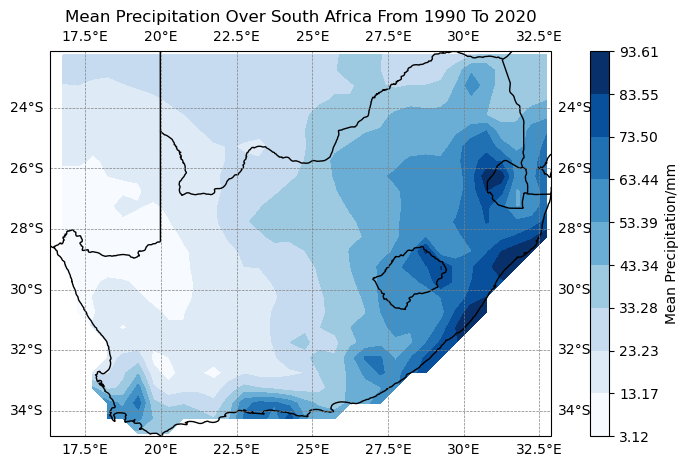

In [15]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([16.35, 32.90, -34.84, -22.12], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
precipitation_plot =Mean_precipitation['pre'].plot.contourf(ax=ax,cmap='Blues',levels=10,transform=ccrs.PlateCarree(),cbar_kwargs={'label': 'Mean Precipitation/mm'},vmin=3.1180105209350586,vmax=93.6080322265625)
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color='gray', linestyle='--')
plt.title('Mean Precipitation Over South Africa From 1990 To 2020')

plt.show()

# AGGREGATING MONTHLY PRECIPITATION

In [17]:
Monthly_aggregation = Pre_subset.groupby('time.year').sum(dim='time')
print(Monthly_aggregation)

<xarray.Dataset>
Dimensions:  (lon: 33, lat: 26, year: 31)
Coordinates:
  * lon      (lon) float32 16.75 17.25 17.75 18.25 ... 31.25 31.75 32.25 32.75
  * lat      (lat) float32 -34.75 -34.25 -33.75 -33.25 ... -23.25 -22.75 -22.25
  * year     (year) int64 1990 1991 1992 1993 1994 ... 2016 2017 2018 2019 2020
Data variables:
    pre      (year, lat, lon) float32 0.0 0.0 0.0 0.0 ... 441.1 439.6 440.1
    stn      (year, lat, lon) float64 0.0 0.0 0.0 0.0 ... 71.0 89.0 89.0 89.0
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.07 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2304141047. Data generated from:pre.2304141039.dtb
    history:      Fri 14 Apr 12:49:03 BST 2023 : User f098 : Program makegrid...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk


# ANNUAL MEAN PRECIPITATION 

In [31]:
Annual_mean = Monthly_aggregation.mean(dim=['lat','lon'])
print(Annual_mean)

<xarray.Dataset>
Dimensions:  (year: 31)
Coordinates:
  * year     (year) int64 1990 1991 1992 1993 1994 ... 2016 2017 2018 2019 2020
Data variables:
    pre      (year) float32 310.5 410.0 245.7 360.1 ... 357.8 321.9 320.2 370.2
    stn      (year) float64 81.9 81.9 81.9 81.9 81.9 ... 35.14 35.33 35.89 35.9


# ANNUAL MEAN PRECIPITATION TIME SERIES OVER SOUTH AFRICA FROM 1990 TO 2020 


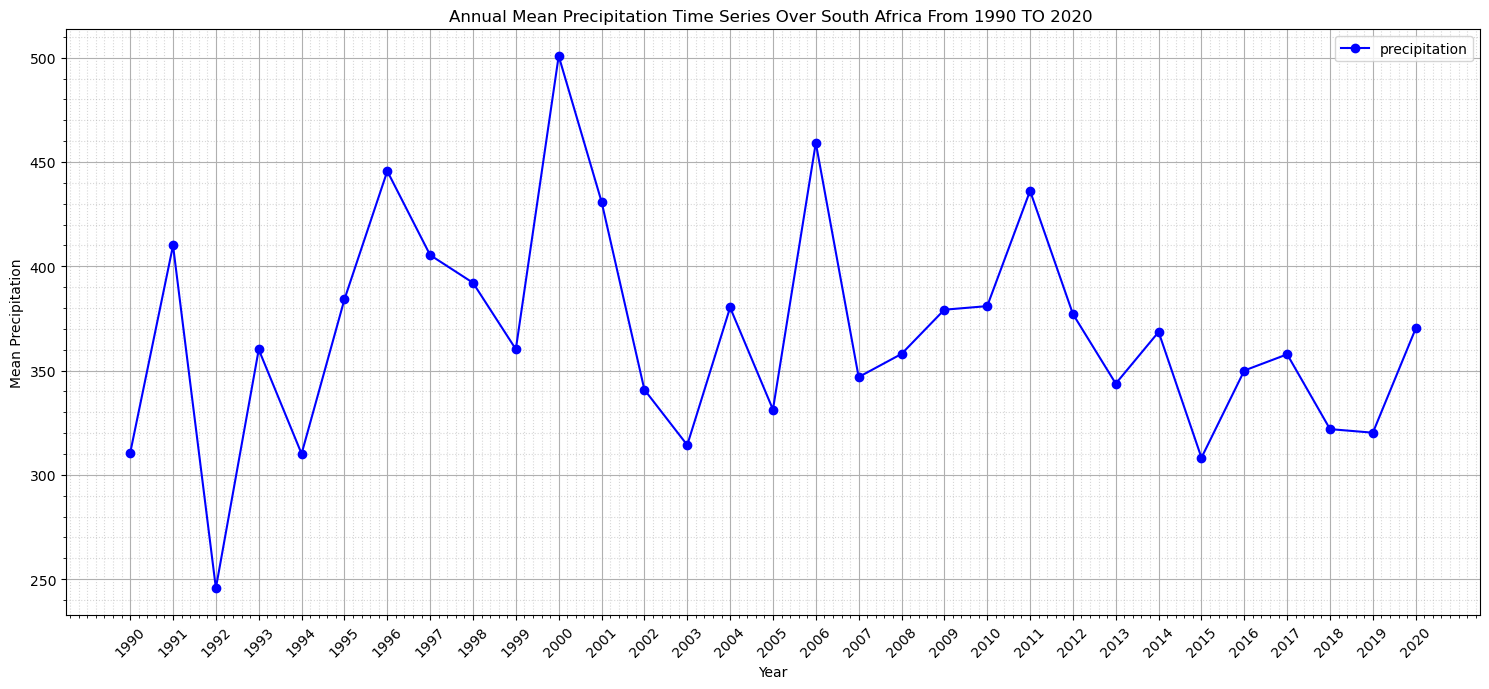

In [24]:
plt.figure(figsize=(15, 7))
Annual_mean['pre'].plot(marker='o', linestyle='-', color='blue',label='precipitation')
plt.xlabel('Year')
plt.ylabel('Mean Precipitation')
plt.title('Annual Mean Precipitation Time Series Over South Africa From 1990 TO 2020 ')
plt.grid(True)
plt.xticks(Annual_mean['year'].values[::1],rotation=45)
plt.tight_layout()
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', alpha=0.5)
plt.legend()
plt.show()

# IMPORTING SciPy STATISTICAL MODULE

In [25]:
from scipy.stats import linregress

# EXTRACTING YEARLY VALUES,PRECIPITATION VALUES AND PERFORMING TRENDLINE ANALYSIS

In [36]:
years = Annual_mean['year'].values
precipitation = Annual_mean['pre'].values
slope, intercept, r_value, p_value, std_err = linregress(years, precipitation)
trend_line = slope * years + intercept

# INSERTING TRENDLINE INTO TIME SERIES PLOT

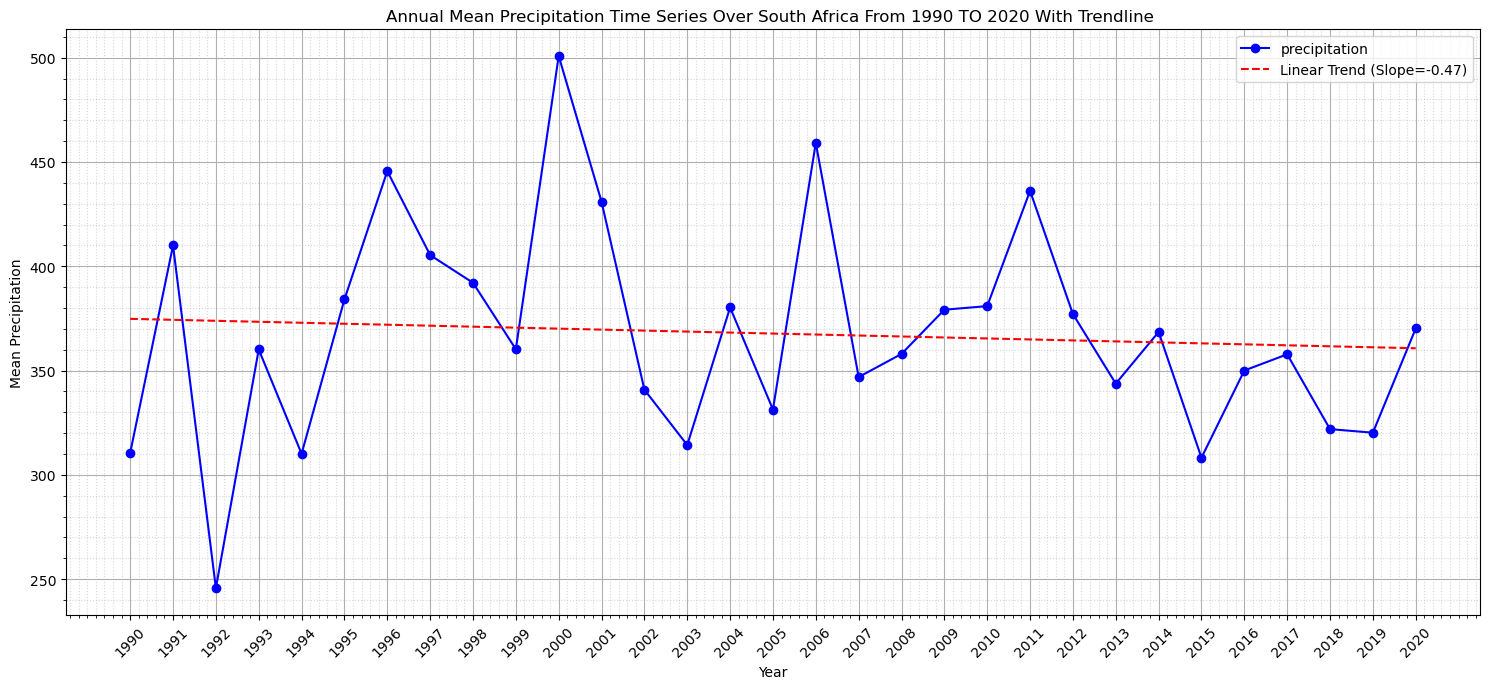

trend slope: -0.470222 mm/year
R-squared value: 0.01
P-value: 0.661
Standard error: 1.06


In [65]:
plt.figure(figsize=(15, 7))
Annual_mean['pre'].plot(marker='o', linestyle='-', color='blue', label='precipitation')
plt.plot(years, trend_line, color='red', linestyle='--', label=f'Linear Trend (Slope={slope:.2f})')
plt.xlabel('Year')
plt.ylabel('Mean Precipitation')
plt.title('Annual Mean Precipitation Time Series Over South Africa From 1990 TO 2020 With Trendline ')
plt.grid(True)
plt.xticks(Annual_mean['year'].values[::1],rotation=45)
plt.minorticks_on()
plt.grid(which='minor',linestyle=':',alpha=0.5)
plt.tight_layout()
plt.legend()
plt.show()

print(f"trend slope: {slope:f} mm/year")
print(f"R-squared value: {r_value**2:.2f}")
print(f"P-value: {p_value:.3f}")
print(f"Standard error: {std_err:.2f}")

# STANDARD DEVIATION

In [29]:
Standard_deviation = Annual_mean['pre'].std(dim='year')
print(f"{Standard_deviation.item():f} mm")

51.240868 mm


# LOADING DATASET FOR 1990 TO 1999

In [329]:
Pre_1990_1999 = Pre_dataset.sel(time=slice('1990','1999'),lon=slice(minimum_longitude,maximum_longitude),lat=slice(minimum_latitude,maximum_latitude))
print(Pre_1990_1999)

<xarray.Dataset>
Dimensions:  (lon: 33, lat: 26, time: 120)
Coordinates:
  * lon      (lon) float32 16.75 17.25 17.75 18.25 ... 31.25 31.75 32.25 32.75
  * lat      (lat) float32 -34.75 -34.25 -33.75 -33.25 ... -23.25 -22.75 -22.25
  * time     (time) datetime64[ns] 1990-01-16 1990-02-15 ... 1999-12-16
Data variables:
    pre      (time, lat, lon) float32 ...
    stn      (time, lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.07 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2304141047. Data generated from:pre.2304141039.dtb
    history:      Fri 14 Apr 12:49:03 BST 2023 : User f098 : Program makegrid...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk


# PRECIPITATION MEAN FROM 1990 TO 1999

In [43]:
Pre_1990_1999_Mean = Pre_subset.sel(time=slice('1990','1999')).mean(dim='time')
print(Pre_1990_1999_Mean)

<xarray.Dataset>
Dimensions:  (lon: 33, lat: 26)
Coordinates:
  * lon      (lon) float32 16.75 17.25 17.75 18.25 ... 31.25 31.75 32.25 32.75
  * lat      (lat) float32 -34.75 -34.25 -33.75 -33.25 ... -23.25 -22.75 -22.25
Data variables:
    pre      (lat, lon) float32 nan nan nan nan nan ... 32.44 33.79 33.54 36.32
    stn      (lat, lon) float64 nan nan nan nan nan 8.0 ... 8.0 8.0 8.0 8.0 8.0


# DETERMINING THE MINIMUM AND MAXIMUM VALUES FOR COLORBAR REPRESENTATION

In [64]:
MIN_1990_1999 = Pre_1990_1999_Mean['pre'].min().item()
MAX_1990_1999 = Pre_1990_1999_Mean ['pre'].max().item()

print(f"Minimum precipitation: {MIN_1990_1999}")
print(f"Maximum precipitation: {MAX_1990_1999}")

Minimum precipitation: 2.7366671562194824
Maximum precipitation: 92.30497741699219


# SPATIAL PLOTTING MEAN PRECIPITATION FROM 1990 TO 1999

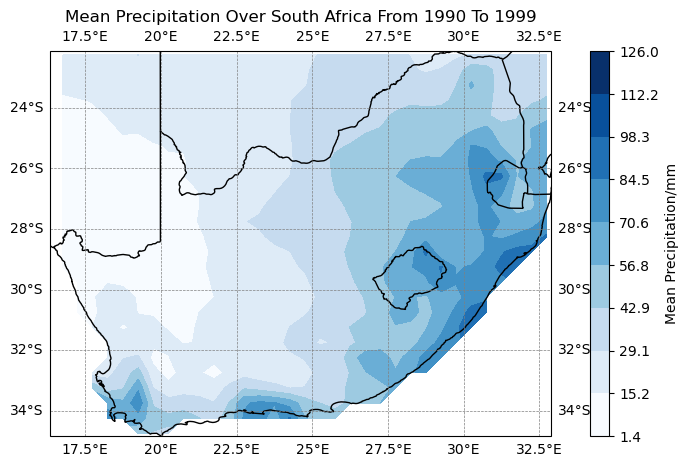

In [178]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([16.35, 32.90, -34.84, -22.12], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
First_Decade_Precipitation_Plot = Pre_1990_1999_Mean ['pre'].plot.contourf(ax=ax,cmap='Blues',levels=10,transform=ccrs.PlateCarree(),cbar_kwargs={'label': 'Mean Precipitation/mm'},vmin=1.3583334684371948,vmax=125.99999237060547)
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color='gray', linestyle='--')
plt.title('Mean Precipitation Over South Africa From 1990 To 1999')

plt.show()

# LOADING DATASET FOR 2010 TO 2020

In [8]:
Pre_2010_2020 = Pre_dataset.sel(time=slice('2010','2020'),lon=slice(minimum_longitude,maximum_longitude),lat=slice(minimum_latitude,maximum_latitude))
print(Pre_2010_2020)

<xarray.Dataset>
Dimensions:  (lon: 33, lat: 26, time: 132)
Coordinates:
  * lon      (lon) float32 16.75 17.25 17.75 18.25 ... 31.25 31.75 32.25 32.75
  * lat      (lat) float32 -34.75 -34.25 -33.75 -33.25 ... -23.25 -22.75 -22.25
  * time     (time) datetime64[ns] 2010-01-16 2010-02-15 ... 2020-12-16
Data variables:
    pre      (time, lat, lon) float32 ...
    stn      (time, lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.07 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2304141047. Data generated from:pre.2304141039.dtb
    history:      Fri 14 Apr 12:49:03 BST 2023 : User f098 : Program makegrid...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk


# PRECIPITATION MEAN FROM 2010 TO 2020

In [39]:
Pre_2010_2020_Mean = Pre_subset.sel(time=slice('2010','2020')).mean(dim='time')
print(Pre_2010_2020_Mean)

<xarray.Dataset>
Dimensions:  (lon: 33, lat: 26)
Coordinates:
  * lon      (lon) float32 16.75 17.25 17.75 18.25 ... 31.25 31.75 32.25 32.75
  * lat      (lat) float32 -34.75 -34.25 -33.75 -33.25 ... -23.25 -22.75 -22.25
Data variables:
    pre      (lat, lon) float32 nan nan nan nan nan ... 35.74 37.43 37.34 38.15
    stn      (lat, lon) float64 nan nan nan nan nan ... 5.242 6.53 6.53 5.977


# DETERMINING THE MINIMUM AND MAXIMUM VALUES FOR COLORBAR REPRESENTATION

In [189]:
MIN_2010_2020 = Pre_2010_2020_Mean['pre'].min().item()
MAX_2010_2020 = Mean_pre_2010_2020 ['pre'].max().item()

print(f"Minimum precipitation: {MIN_2010_2020}")
print(f"Maximum precipitation: {MAX_2010_2020 }")

Minimum precipitation: 2.944697141647339
Maximum precipitation: 104.66666412353516


# SPATIAL PLOTTING MEAN PRECIPITATION FROM 2010 TO 2020

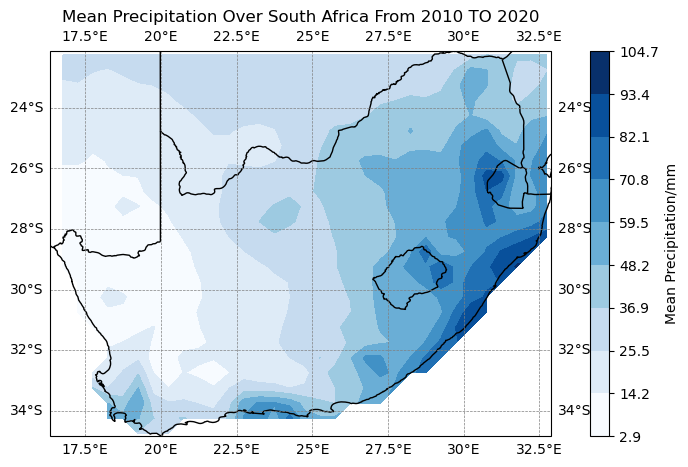

In [191]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([16.35, 32.90, -34.84, -22.12], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
Recent_Decade_Precipitation_Plot = Pre_2010_2020_Mean ['pre'].plot.contourf(ax=ax,cmap='Blues',levels=10,transform=ccrs.PlateCarree(),cbar_kwargs={'label': 'Mean Precipitation/mm'},vmin=2.944697141647339,vmax=104.66666412353516)
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color='gray', linestyle='--')
plt.title('Mean Precipitation Over South Africa From 2010 TO 2020')

plt.show()

# SUBTRACTING 1990 TO 1999 DATAARRAY FROM 2010 TO 2020 DATAARRAY 

In [45]:
difference_map = Pre_2010_2020_Mean - Pre_1990_1999_Mean
print(difference_map) 

<xarray.Dataset>
Dimensions:  (lon: 33, lat: 26)
Coordinates:
  * lon      (lon) float32 16.75 17.25 17.75 18.25 ... 31.25 31.75 32.25 32.75
  * lat      (lat) float32 -34.75 -34.25 -33.75 -33.25 ... -23.25 -22.75 -22.25
Data variables:
    pre      (lat, lon) float32 nan nan nan nan nan ... 3.299 3.639 3.804 1.825
    stn      (lat, lon) float64 nan nan nan nan ... -2.758 -1.47 -1.47 -2.023


# DETERMINING THE MINIMUM AND MAXIMUM VALUES FOR COLORBAR REPRESENTATION

In [202]:
difference_map_min = difference_map['pre'].min().item()
difference_map_max = difference_map['pre'].max().item()

print(f"Minimum precipitation: {difference_map_min}")
print(f"Maximum precipitation: {difference_map_max}")

Minimum precipitation: -22.163799285888672
Maximum precipitation: 7.196287155151367


# SPATIAL PLOTTING DIFFERENCE MAP (2010–2020 minus 1990–1999)

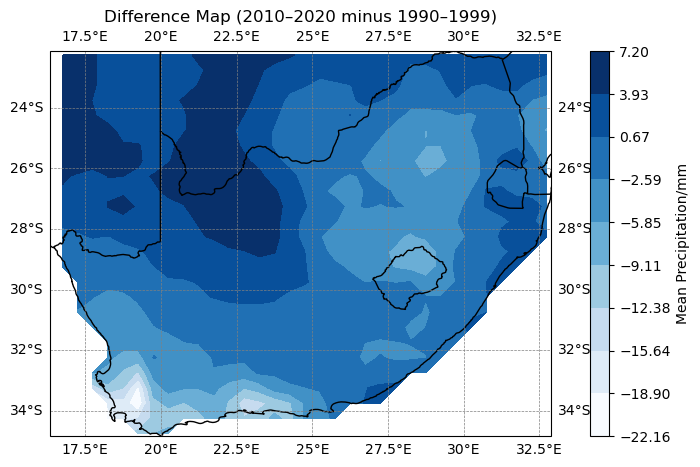

In [275]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([16.35, 32.90, -34.84, -22.12], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
difference_map_Precipitation_Plot = difference_map['pre'].plot.contourf(ax=ax,cmap='Blues',levels=10,transform=ccrs.PlateCarree(),cbar_kwargs={'label': 'Mean Precipitation/mm'},vmin=-22.163799285888672,vmax=7.196287155151367)
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color='gray', linestyle='--')
plt.title('Difference Map (2010–2020 minus 1990–1999)')

plt.show()

# FLATTENING 2D DATAARRAY TO 1D DATASET

In [46]:
difference_map_flatten = difference_map['pre'].stack(grid_point=('lat', 'lon'))
print(difference_map_flatten)

<xarray.DataArray 'pre' (grid_point: 858)>
array([            nan,             nan,             nan,             nan,
                   nan, -1.13270378e+01, -9.28984070e+00, -7.95939064e+00,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
       -2.01233902e+01, -1.66530075e+01, -1.57548485e+01, -1.16507339e+01,
       -1.09480247e+01, -1.12537003e+01, -9.89410019e+00, -8.00068474e+00,
       -9.61197281e+00, -1.21257591e+01, -1.13461380e+01, -7.98218918e+00,
       -1.04610672e+01, -5.54620361e+00, -3.46931076e+00,

# SORTING IN DESCENDING ORDER TO FIND THE LARGEST INCREASES IN PRECIPITATION

In [57]:
largest_increases = difference_map_flatten.sortby('grid_point', ascending=False).head(5)
print(largest_increases)

<xarray.DataArray 'pre' (grid_point: 5)>
array([1.8245506, 3.803936 , 3.6393127, 3.2991753, 2.9021187],
      dtype=float32)
Coordinates:
  * grid_point  (grid_point) object MultiIndex
  * lat         (grid_point) float32 -22.25 -22.25 -22.25 -22.25 -22.25
  * lon         (grid_point) float32 32.75 32.25 31.75 31.25 30.75


# EXTRACTING LATITUDE, LONGITUDE AND MAGNITUDE OF CHANGE

In [58]:
difference_map_flatten_dictionary = []
for i in range(largest_increases.size):
    lat = largest_increases['grid_point'].isel(grid_point=i)['lat'].item()
    lon = largest_increases['grid_point'].isel(grid_point=i)['lon'].item()
    magnitude_of_change = largest_increases.isel(grid_point=i).item()
    difference_map_flatten_dictionary.append({'Latitude': lat, 'Longitude': lon, 'Magnitude of Change (mm/year)': magnitude_of_change})

# IMPORTING PANDAS LIBRARY

In [60]:
import pandas as pd

# CREATING A PANDAS DATAFRAME FOR THE TOP 5 LOCATIONS WITH THE LARGEST INCREASE IN PRECIPITATION

In [61]:
difference_map_flatten_dictionary_df = pd.DataFrame(difference_map_flatten_dictionary)
difference_map_flatten_dictionary_df
print("Top 5 Grid Points (locations) with Largest Increase in Precipitation")
difference_map_flatten_dictionary_df

Top 5 Grid Points (locations) with Largest Increase in Precipitation


,Latitude,Longitude,Magnitude of Change (mm/year)
0,-22.25,32.75,1.824551
1,-22.25,32.25,3.803936
2,-22.25,31.75,3.639313
3,-22.25,31.25,3.299175
4,-22.25,30.75,2.902119


# INSPECTING LARGEST DECREASES DATASET FOR NAN VALUES

In [48]:
largest_decreases = difference_map_flatten.sortby('grid_point', ascending=True).head(5)
print(largest_decreases)

<xarray.DataArray 'pre' (grid_point: 5)>
array([nan, nan, nan, nan, nan], dtype=float32)
Coordinates:
  * grid_point  (grid_point) object MultiIndex
  * lat         (grid_point) float32 -34.75 -34.75 -34.75 -34.75 -34.75
  * lon         (grid_point) float32 16.75 17.25 17.75 18.25 18.75


# DROPPING NAN VALUES AND SORTING IN ASCENDING ORDER TO FIND LARGEST DECREASES

In [54]:
valid_differences = difference_map_flatten.dropna(dim='grid_point')
largest_decreases = valid_differences.sortby('grid_point', ascending=True).head(5)
print(largest_decreases)

<xarray.DataArray 'pre' (grid_point: 5)>
array([-11.327038 ,  -9.289841 ,  -7.9593906, -20.12339  , -16.653008 ],
      dtype=float32)
Coordinates:
  * grid_point  (grid_point) object MultiIndex
  * lat         (grid_point) float32 -34.75 -34.75 -34.75 -34.25 -34.25
  * lon         (grid_point) float32 19.25 19.75 20.25 18.25 18.75


# EXTRACTING LONGITUDE, LATITUDE AND MAGNITUDE OF CHANGE

In [55]:
difference_map_flatten_dictionary_2 = []
for i in range(largest_decreases.size):
    lat = largest_decreases['grid_point'].isel(grid_point=i)['lat'].item()
    lon = largest_decreases['grid_point'].isel(grid_point=i)['lon'].item()
    magnitude_of_change = largest_decreases.isel(grid_point=i).item()
    difference_map_flatten_dictionary_2.append({'Latitude': lat, 'Longitude': lon, 'Magnitude of Change (mm/year)': magnitude_of_change})

# CREATING A PANDAS DATAFRAME FOR THE TOP 5 LOCATIONS WITH THE LARGEST DECREASES IN PRECIPITATION

In [62]:
difference_map_flatten_dictionary_df_2 = pd.DataFrame(difference_map_flatten_dictionary_2)
difference_map_flatten_dictionary_df_2
print("Top 5 Grid Points (locations) with Largest Decrease in Precipitation")
difference_map_flatten_dictionary_df_2

Top 5 Grid Points (locations) with Largest Decrease in Precipitation


,Latitude,Longitude,Magnitude of Change (mm/year)
0,-34.75,19.25,-11.327038
1,-34.75,19.75,-9.289841
2,-34.75,20.25,-7.959391
3,-34.25,18.25,-20.123390
4,-34.25,18.75,-16.653008


# LOADING ANNUAL MEAN DATSET

In [390]:
annual_mean_3 = Pre_subset.groupby('time.year').mean()
print(annual_mean_3)

<xarray.Dataset>
Dimensions:  (lon: 33, lat: 26, year: 31)
Coordinates:
  * lon      (lon) float32 16.75 17.25 17.75 18.25 ... 31.25 31.75 32.25 32.75
  * lat      (lat) float32 -34.75 -34.25 -33.75 -33.25 ... -23.25 -22.75 -22.25
  * year     (year) int64 1990 1991 1992 1993 1994 ... 2016 2017 2018 2019 2020
Data variables:
    pre      (year, lat, lon) float32 nan nan nan nan ... 36.76 36.63 36.68
    stn      (year, lat, lon) float64 nan nan nan nan ... 7.417 7.417 7.417
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.07 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2304141047. Data generated from:pre.2304141039.dtb
    history:      Fri 14 Apr 12:49:03 BST 2023 : User f098 : Program makegrid...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk


# CALCULATING 90TH PERCENTILE

In [404]:
percentile_90 = annual_mean_3['pre'].quantile(0.9,dim='year')
print(percentile_90)

<xarray.DataArray 'pre' (lat: 26, lon: 33)>
array([[        nan,         nan,         nan,         nan,         nan,
         49.191666 ,  44.308334 ,  41.958332 ,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan],
       [        nan,         nan,         nan,  80.24166  ,  69.291664 ,
         67.75833  ,  51.716663 ,  50.725006 ,  52.649998 ,  46.866665 ,
         39.041668 ,  50.716663 ,  81.025    ,  86.90833  ,  67.875    ,
         98.10834  ,  67.083336 ,  63.28333  ,  63.69167  ,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan

C:\Users\HP\newana\Lib\site-packages\numpy\lib\nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


# IDENTIFYING WET YEARS

In [396]:
wet_years = annual_mean_3['pre'] > percentile_90
print(wet_years)

<xarray.DataArray 'pre' (year: 31, lat: 26, lon: 33)>
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False,  True, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
...
        ...,
        [False, False, False, .

# WET YEAR COUNT

In [398]:
wet_year_counts = wet_years.sum(dim='year')
print(wet_year_counts)

<xarray.DataArray 'pre' (lat: 26, lon: 33)>
array([[0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0],
       [0, 3, 3, 3, 3, 3, 3,

# FINDING THE MINIMUM AND MAXIMUM WET YEAR COUNT FOR COLORBAR REPRESENTATION

In [400]:
MIN_COUNT_1990_2020 = wet_year_counts.min().item()
MAX_COUNT_1990_2020 = wet_year_counts.max().item()

print(f"Minimum COUNT: {MIN_COUNT_1990_2020}")
print(f"Maximum COUNT: {MAX_COUNT_1990_2020}")

Minimum COUNT: 0
Maximum COUNT: 3


# PLOTTING SPATIAL FREQUENCY OF WET YEARS FROM 1990 TO 2020

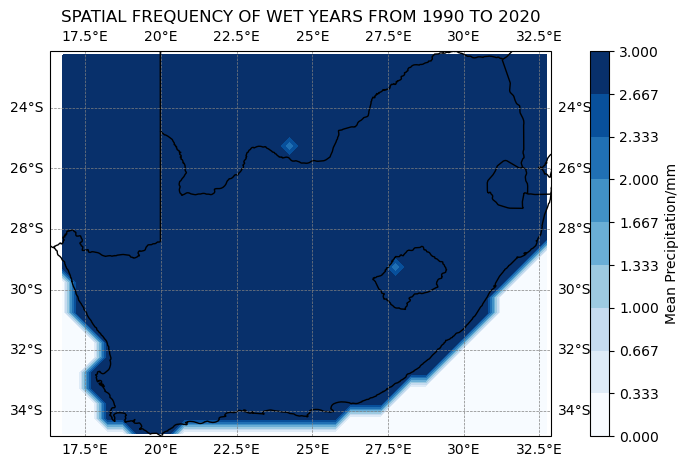

In [402]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([16.35, 32.90, -34.84, -22.12], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
difference_map_Precipitation_Plot_2 = wet_year_counts.plot.contourf(ax=ax,cmap='Blues',levels=10,transform=ccrs.PlateCarree(),cbar_kwargs={'label': 'Mean Precipitation/mm'},vmin=0,vmax=3)
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color='gray', linestyle='--')
plt.title('SPATIAL FREQUENCY OF WET YEARS FROM 1990 TO 2020')

plt.show()